In [1]:
import warnings
#warnings.simplefilter(action="ignore", category=FutureWarning)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
df = pd.read_excel("training_data/250820/NeuralNetwork_250820.xlsx")

In [3]:
df.head()

,YY/MM/DD,Time,Unnamed: 2,U / V,I / A,T / °C,Unnamed: 6,Unnamed: 7,Unnamed: 8,V / l min-1,Vtotal / l,"Vtotal,corr / l",Unnamed: 12,Unnamed: 13,Vstart / l
0,2025-08-20,13:01:58,NaN,19.769231,0.0,27,NaN,NaN,2020-08-25 13:01:58.659,0.0,4.560843,0.0,NaN,NaN,4.56084
1,2025-08-20,13:01:58,NaN,19.769231,0.0,27,NaN,NaN,2020-08-25 13:01:58.793,0.0,4.560843,0.0,NaN,NaN,NaN
2,2025-08-20,13:01:58,NaN,19.769231,0.0,27,NaN,NaN,2020-08-25 13:01:58.914,0.0,4.560843,0.0,NaN,NaN,NaN
3,2025-08-20,13:01:59,NaN,19.769231,0.0,27,NaN,NaN,2020-08-25 13:01:59.410,0.0,4.560843,0.0,NaN,NaN,Vges / l
4,2025-08-20,13:01:59,NaN,19.769231,0.0,27,NaN,NaN,2020-08-25 13:01:59.183,0.0,4.560843,0.0,NaN,NaN,2.26464


In [4]:
df.dropna(axis="columns", inplace=True)

In [5]:
df.drop(df.columns[[0,1, 5, 6,7]], axis=1, inplace=True)

In [6]:
df.shape

(2765, 4)

In [7]:
df.describe

<bound method NDFrame.describe of           U / V  I / A  T / °C  Vtotal,corr / l
0     19.769231    0.0      27         0.000000
1     19.769231    0.0      27         0.000000
2     19.769231    0.0      27         0.000000
3     19.769231    0.0      27         0.000000
4     19.769231    0.0      27         0.000000
...         ...    ...     ...              ...
2760  16.615385    0.4      30         2.264635
2761  16.615385    0.4      30         2.264635
2762  16.615385    0.4      30         2.264635
2763  16.615385    0.4      30         2.264635
2764  16.615385    0.4      30         2.264635

[2765 rows x 4 columns]>

In [8]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:3]
y = df.iloc[:,[3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
len(X_test)

553

In [10]:
len(y_test)

553

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [12]:
y_test

array([[2.178431],
       [0.693053],
       [1.436255],
       [1.999759],
       [0.67444 ],
       [1.179925],
       [1.918589],
       [0.930522],
       [1.515689],
       [0.205057],
       [1.347063],
       [1.988508],
       [0.      ],
       [1.561454],
       [1.238919],
       [1.136917],
       [0.175535],
       [2.178052],
       [2.165169],
       [0.116929],
       [2.076383],
       [0.380527],
       [0.029193],
       [1.832963],
       [0.058437],
       [2.178431],
       [1.529666],
       [1.560762],
       [0.26411 ],
       [0.038737],
       [2.076383],
       [1.680815],
       [0.205057],
       [0.234611],
       [1.606834],
       [0.954908],
       [2.165255],
       [1.216513],
       [0.493054],
       [0.205057],
       [0.234611],
       [0.608698],
       [1.64168 ],
       [0.38396 ],
       [0.763576],
       [0.552826],
       [0.232603],
       [0.      ],
       [1.120566],
       [2.207046],
       [2.084538],
       [0.175535],
       [0.11

In [13]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(1, name="layer3"),
    ]
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.compile(optimizer="adam", loss = 'mean_squared_error')

In [15]:
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
2212/2212 [==============================] - 0s 86us/sample - loss: 1.7201
Epoch 2/100
2212/2212 [==============================] - 0s 21us/sample - loss: 1.3701
Epoch 3/100
2212/2212 [==============================] - 0s 20us/sample - loss: 1.1173
Epoch 4/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.9235
Epoch 5/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.8087
Epoch 6/100
2212/2212 [==============================] - 0s 21us/sample - loss: 0.7308
Epoch 7/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.6739
Epoch 8/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.6328
Epoch 9/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.6039
Epoch 10/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.5856
Epoch 11/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.5733
Epoch 12/100
2212/2212 [=================

2212/2212 [==============================] - 0s 20us/sample - loss: 0.2319
Epoch 94/100
2212/2212 [==============================] - 0s 21us/sample - loss: 0.2316
Epoch 95/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.2316
Epoch 96/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.2316
Epoch 97/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.2316
Epoch 98/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.2313
Epoch 99/100
2212/2212 [==============================] - 0s 19us/sample - loss: 0.2317
Epoch 100/100
2212/2212 [==============================] - 0s 20us/sample - loss: 0.2315


In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred

array([[ 1.8439928 ],
       [ 1.3852366 ],
       [ 1.3590331 ],
       [ 1.3816081 ],
       [ 1.3852366 ],
       [ 1.1892018 ],
       [ 1.1733292 ],
       [ 0.9580096 ],
       [ 1.3590331 ],
       [ 0.6261517 ],
       [ 1.3590331 ],
       [ 1.4045217 ],
       [ 0.23595864],
       [ 1.1347535 ],
       [ 1.3590331 ],
       [ 1.1892018 ],
       [-0.23671281],
       [ 1.8439928 ],
       [ 1.8439928 ],
       [ 0.22571886],
       [ 1.6128005 ],
       [ 0.3711259 ],
       [ 0.23595864],
       [ 1.1631514 ],
       [-0.17744261],
       [ 1.8439928 ],
       [ 1.3590331 ],
       [ 1.1347535 ],
       [ 0.09488916],
       [ 0.23595864],
       [ 1.6128005 ],
       [ 0.44591916],
       [ 0.6488395 ],
       [ 0.603464  ],
       [ 1.205725  ],
       [ 0.9580096 ],
       [ 1.8439928 ],
       [ 1.3590331 ],
       [ 1.2944102 ],
       [ 0.6488395 ],
       [ 0.603464  ],
       [ 1.6957703 ],
       [ 1.205725  ],
       [ 0.6237466 ],
       [ 0.49562484],
       [ 1

In [18]:
from sklearn.metrics import mean_squared_error
me = mean_squared_error(y_test, y_pred)
print(me)

0.2401404387737843


In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'actual')

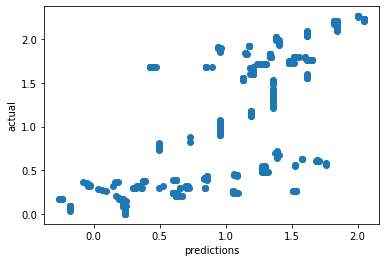

In [20]:
plt.scatter(y_pred, y_test)
plt.xlabel("predictions")
plt.ylabel("actual")

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5998719390487814